In [1]:
# Regressions with Stocks API

In [2]:
import pandas as pd
import requests
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

In [3]:
res = requests.get('https://api.iextrading.com/1.0/stock/tsla/chart/5y')
data = res.json()
df = pd.DataFrame(data)
closes = df.close

In [4]:
# df['date'] = df['date'].apply((lambda x: pd.Timestamp(x)))
df['date'] = pd.to_datetime(df['date']) # see alternate above

In [5]:
### DataFrame Description

In [6]:
df.describe()

,change,changeOverTime,changePercent,close,high,low,open,unadjustedVolume,volume,vwap
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1.258000e+03,1258.000000
mean,0.150278,0.831740,0.104160,257.762493,262.055154,253.279083,257.786011,6.152647e+06,6.152647e+06,257.694672
std,7.288683,0.397139,2.793771,55.885394,56.672820,55.062612,55.981178,3.791643e+06,3.791643e+06,55.890202
min,-42.750000,-0.009807,-13.902000,139.340000,144.350000,136.671000,140.500000,7.102770e+05,7.102770e+05,141.418500
25%,-3.505000,0.513484,-1.397250,212.977500,216.742500,208.687500,213.002500,3.799187e+06,3.799187e+06,212.337475
50%,0.030000,0.755721,0.012500,247.065000,249.870000,242.890500,247.080000,5.166632e+06,5.166632e+06,247.311100
75%,3.957500,1.175277,1.589500,306.105000,310.662500,300.570000,306.460000,7.284091e+06,7.284091e+06,306.270475
max,48.700000,1.735930,17.347000,385.000000,389.610000,379.345000,386.690000,3.364969e+07,3.364969e+07,384.927100


In [7]:
### DataFrame Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 12 columns):
change              1258 non-null float64
changeOverTime      1258 non-null float64
changePercent       1258 non-null float64
close               1258 non-null float64
date                1258 non-null datetime64[ns]
high                1258 non-null float64
label               1258 non-null object
low                 1258 non-null float64
open                1258 non-null float64
unadjustedVolume    1258 non-null int64
volume              1258 non-null int64
vwap                1258 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 118.0+ KB


In [8]:
X_full = df.date
Y_full = df.close
X_train, X_test, Y_train, Y_test = train_test_split(X_full, Y_full, test_size=0.2, random_state=42)

Text(0.5, 1.0, 'Training set')

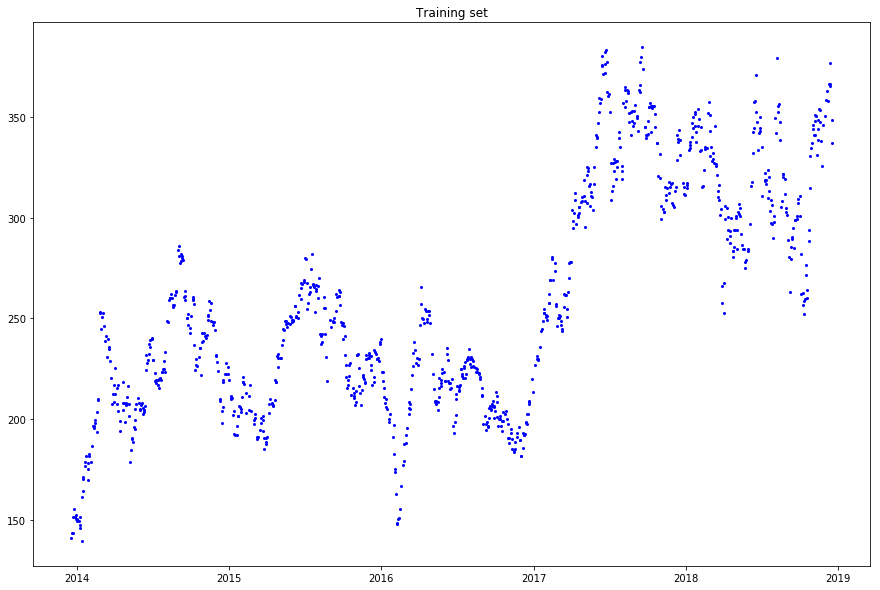

In [9]:
plt.figure(figsize=(15,10))
plt.plot(X_train, Y_train, 'bo', markersize=2)
plt.title('Training set')

Text(0.5, 1.0, 'Test set')

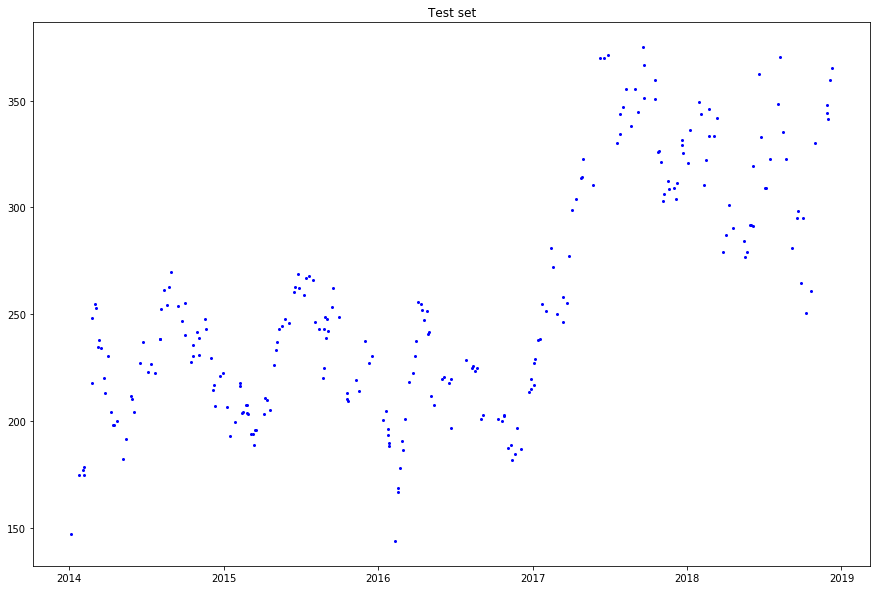

In [10]:
plt.figure(figsize=(15,10))
plt.plot(X_test, Y_test, 'bo', markersize=2)
plt.title('Test set')

In [11]:
X_years = [matplotlib.dates.date2num(x) for x in X_train]

coefs_lin = poly.polyfit(X_years, Y_train, 1)
coefs_sq = poly.polyfit(X_years, Y_train, 2)
coefs_ten = poly.polyfit(X_years, Y_train, 11)

/Users/jbtellez/.local/share/virtualenvs/regressions-8feEjMzM/lib/python3.7/site-packages/ipykernel_launcher.py:5: RankWarning: The fit may be poorly conditioned
  """


In [12]:
X_line = np.linspace(matplotlib.dates.date2num(X_train.min()), matplotlib.dates.date2num(X_train.max()), 10000)
ffit_ln = poly.polyval(X_line, coefs_lin)
ffit_sq = poly.polyval(X_line, coefs_sq)
ffit_ten = poly.polyval(X_line, coefs_ten)

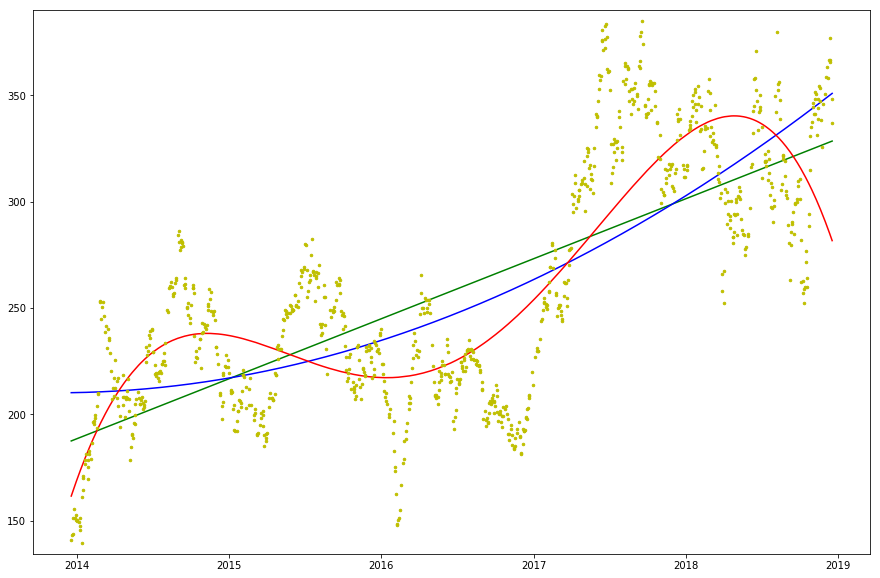

In [13]:
plt.figure(figsize=(15,10))
plt.ylim(min(Y_train - 5), max(Y_train + 5))
plt.plot(X_line, ffit_ln, 'g')
plt.plot(X_line, ffit_sq, 'b')
plt.plot(X_line, ffit_ten, 'r')

plt.plot(X_train, Y_train, 'y.', markersize=5)